In [3]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
import csv
import pandas as pd
import seaborn as sns

In [4]:
with open('chembl_dopamin_d2_rp_ki.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligandy = [Chem.MolFromSmiles(m["Smiles"]) for m in reader]
molekulicka = ligandy[42]

In [5]:
#pocet kruhu
Chem.GetSSSR(molekulicka)

5

In [6]:
#pocet otocnych vazeb
Chem.CalcNumRotatableBonds(molekulicka)

4

In [7]:
#nevodikove atomy
molekulicka.GetNumHeavyAtoms()

31

In [8]:
# akceptory a donorovy vodikove vazby
print("akceptory " + str(rdescriptors.CalcNumLipinskiHBA(molekulicka)))
print("donory " + str(rdescriptors.CalcNumLipinskiHBD(molekulicka)))

akceptory 4
donory 0


In [9]:
#molekulova hmotnost
rdescriptors.CalcExactMolWt(molekulicka)

434.16735266800004

In [10]:
#TPSA
rdescriptors.CalcTPSA(molekulicka)

23.78

In [11]:
#rozdelovaci koeficient oktanol/voda
Descriptors.MolLogP(molekulicka)

5.424420000000005

In [12]:
kruhy = [Chem.GetSSSR(l) for l in ligandy]
rotovatelne_vazby = [Chem.CalcNumRotatableBonds(l)for l in ligandy]
nevodiky = [l.GetNumHeavyAtoms() for l in ligandy]
h_akceptory = [rdescriptors.CalcNumLipinskiHBA(l) for l in ligandy]
h_donory = [rdescriptors.CalcNumLipinskiHBD(l) for l in ligandy]
hmotnost = [rdescriptors.CalcExactMolWt(l) for l in ligandy]
tpsa = [rdescriptors.CalcTPSA(l) for l in ligandy]
logp = [Descriptors.MolLogP(l) for l in ligandy]

In [13]:
sns.set(rc={"figure.figsize":(11.7, 11.7)})
df = pd.DataFrame(data={"set":"dopamin_d2", "kruhy": kruhy, "rotovatelne_vazby": rotovatelne_vazby, "atomy": nevodiky, "hba": h_akceptory,
                        "hbd": h_donory, "mw": hmotnost, "tpsa": tpsa, "logp": logp})
df

,set,kruhy,rotovatelne_vazby,atomy,hba,hbd,mw,tpsa,logp
0,dopamin_d2,2,7,23,4,1,337.192090,35.58,3.01440
1,dopamin_d2,2,3,14,3,3,211.114319,50.94,1.58220
2,dopamin_d2,2,3,14,3,3,211.114319,50.94,1.58220
3,dopamin_d2,4,3,25,4,1,336.183778,41.57,3.70552
4,dopamin_d2,3,7,29,5,1,433.132382,44.81,4.11020
...,...,...,...,...,...,...,...,...,...
10468,dopamin_d2,4,7,30,5,1,447.148032,44.81,4.85930
10469,dopamin_d2,6,6,35,7,1,489.219846,72.54,4.08150
10470,dopamin_d2,6,6,35,7,0,507.176267,69.64,4.20990
10471,dopamin_d2,5,7,36,8,2,488.242356,85.35,2.79850


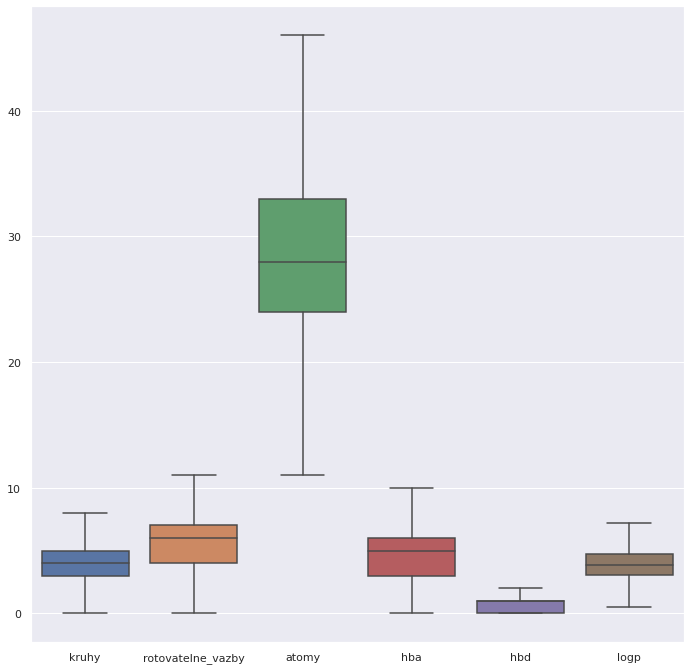

In [15]:
sns.boxplot(data=df[["kruhy", "rotovatelne_vazby", "atomy", "hba", "hbd", "logp"]], showfliers=False)

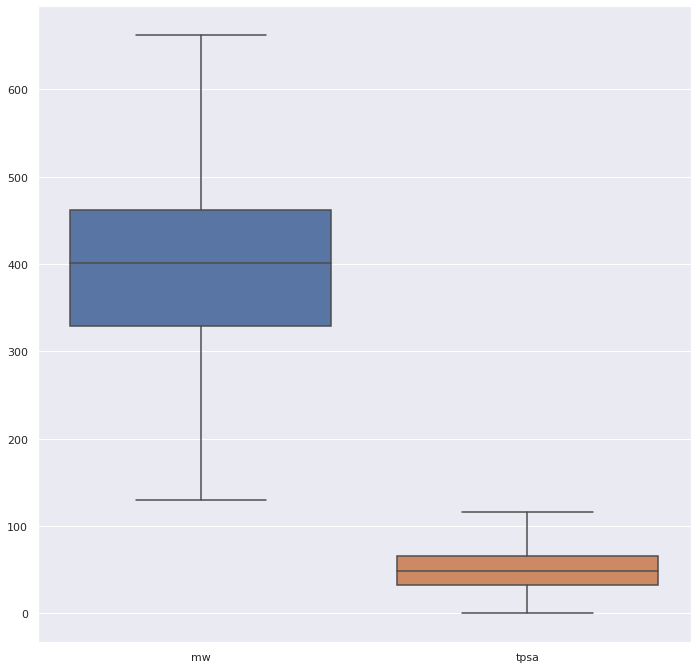

In [17]:
sns.boxplot(data=df[["mw", "tpsa"]], showfliers=False)

In [28]:
drugbank_sdf = Chem.SDMolSupplier("drugbank.sdf")
db = [d for d in drugbank_sdf if d != None]
len(db)

RDKit ERROR: [10:05:05] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [10:06:56] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:06:56] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [10:06:56] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [10:06:56] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [10:06:56] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:06:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:06:57] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [10:06:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:06:57] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:06:57] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [10:06:57] ERROR: Explicit v

7113

In [20]:
db_kruhy = [Chem.GetSSSR(d) for d in db]
db_rotovatelne_vazby = [Chem.CalcNumRotatableBonds(d)for d in db]
db_nevodiky = [d.GetNumHeavyAtoms() for d in db]
db_h_akceptory = [rdescriptors.CalcNumLipinskiHBA(d) for d in db]
db_h_donory = [rdescriptors.CalcNumLipinskiHBD(d) for d in db]
db_hmotnost = [rdescriptors.CalcExactMolWt(d) for d in db]
db_tpsa = [rdescriptors.CalcTPSA(d) for d in db]
db_logp = [Descriptors.MolLogP(d) for d in db]

In [21]:
df_db = pd.DataFrame(data={"set":"drugbank", "kruhy": db_kruhy, "rotovatelne_vazby": db_rotovatelne_vazby, "atomy": db_nevodiky, "hba": db_h_akceptory,
                        "hbd": db_h_donory, "mw": db_hmotnost, "tpsa": db_tpsa, "logp": db_logp})
df_db

,set,kruhy,rotovatelne_vazby,atomy,hba,hbd,mw,tpsa,logp
0,drugbank,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugbank,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugbank,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugbank,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugbank,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7108,drugbank,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugbank,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugbank,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugbank,0,13,21,5,0,330.147689,83.50,-0.00030


In [22]:
df_d2_db = pd.concat([df, df_db], ignore_index=True)
df_d2_db

,set,kruhy,rotovatelne_vazby,atomy,hba,hbd,mw,tpsa,logp
0,dopamin_d2,2,7,23,4,1,337.192090,35.58,3.01440
1,dopamin_d2,2,3,14,3,3,211.114319,50.94,1.58220
2,dopamin_d2,2,3,14,3,3,211.114319,50.94,1.58220
3,dopamin_d2,4,3,25,4,1,336.183778,41.57,3.70552
4,dopamin_d2,3,7,29,5,1,433.132382,44.81,4.11020
...,...,...,...,...,...,...,...,...,...
17581,drugbank,1,0,8,1,1,128.002892,20.23,2.04560
17582,drugbank,3,3,24,9,5,340.079432,149.82,-1.32270
17583,drugbank,6,14,79,27,13,1114.554641,403.10,1.54710
17584,drugbank,0,13,21,5,0,330.147689,83.50,-0.00030


In [23]:
long_d2_db = pd.melt(df_d2_db, id_vars=["set"], value_vars=["kruhy","rotovatelne_vazby", "atomy", "hba", "hbd","logp"])
long_d2_db

,set,variable,value
0,dopamin_d2,kruhy,2.0000
1,dopamin_d2,kruhy,2.0000
2,dopamin_d2,kruhy,2.0000
3,dopamin_d2,kruhy,4.0000
4,dopamin_d2,kruhy,3.0000
...,...,...,...
105511,drugbank,logp,2.0456
105512,drugbank,logp,-1.3227
105513,drugbank,logp,1.5471
105514,drugbank,logp,-0.0003


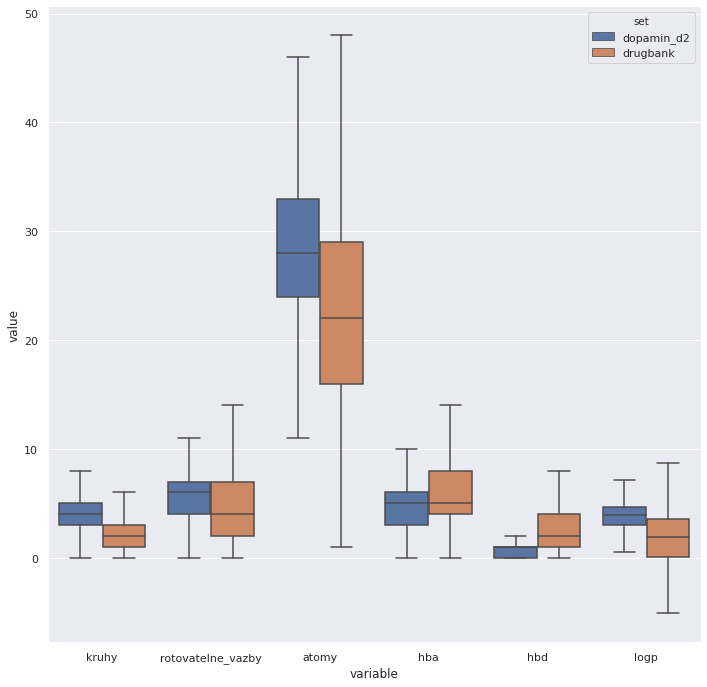

In [29]:
sns.boxplot(y="value", x="variable", hue="set", data = long_d2_db, showfliers=False)

In [30]:
long_d2_db_mw_tpsa = pd.melt(df_d2_db, id_vars=["set"], value_vars=["mw","tpsa"])
long_d2_db_mw_tpsa

,set,variable,value
0,dopamin_d2,mw,337.192090
1,dopamin_d2,mw,211.114319
2,dopamin_d2,mw,211.114319
3,dopamin_d2,mw,336.183778
4,dopamin_d2,mw,433.132382
...,...,...,...
35167,drugbank,tpsa,20.230000
35168,drugbank,tpsa,149.820000
35169,drugbank,tpsa,403.100000
35170,drugbank,tpsa,83.500000


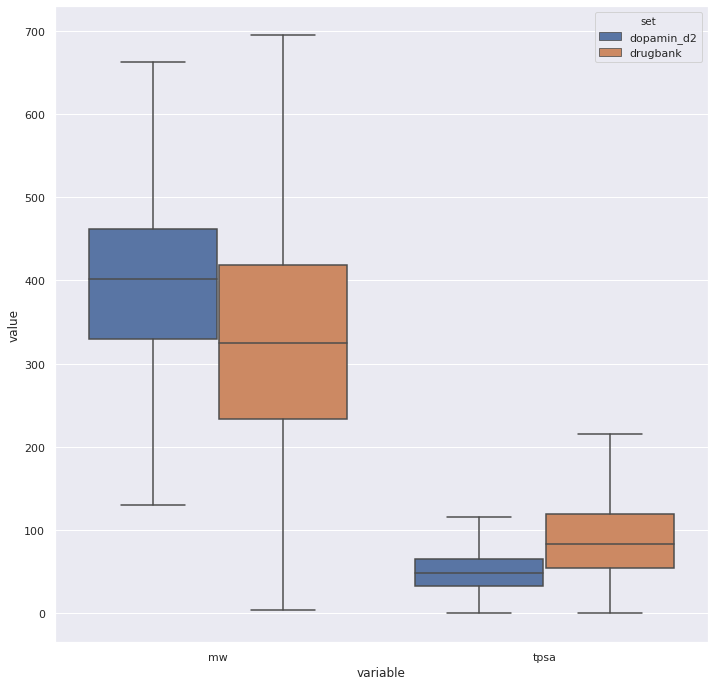

In [32]:
sns.boxplot(y="value", x="variable", hue="set", data = long_d2_db_mw_tpsa, showfliers=False)

Ligandy dopaminového d2 receptoru jsou obecně větší než molekuly z drugbanku (# kruhů, molekulová hmotnost, #atomů), což jsem tak nějak očekávala vzhledem k výsledkům předchozího cvičení. Dalším (dle mého) rozdílem oproti sloučeninám v Drugbank je velikost rozdělovacího koeficientu. Látky působící na dopaminový d2 receptor jsou lipofilnější (hydrofobnější). (Což nějak tak odpovídá tomu, co vím o dopaminových receptorech, jsou to receptory CNS, kdyby chtěly ligandy působit třeba na mozek, musí projít hematoencefalickou barierou (dále BBB - blood brain barier, kterou prochází hlavně lipofilní látky)). Další změna je v TPSA (český ekvivalent nejspíš nevymyslím :)). Podle [tohohle odkazu](https://en.wikipedia.org/wiki/Polar_surface_area) souvisí PSA se schopností molekuly procházet buněčnými membránami - čím méně polárních cancourů na povrchu tím lépe bude procházet membránami. V daném odkazu se uvádí, že pro průchod BBB by látky měly mít hodnoty TPSA pod 90 Å^2, což odpovídá mým "znalostem" o receptoru (a data to potvrzují, tak od oka odhaduji, že ligandy mívají TPSA +/- kolem 50 až 60 Å^2). Ligandy dopaminového d2 receptoru budou nejspíš obecně tvořit méně vodíkových vazeb.

In [34]:
hetatm = [rdescriptors.CalcNumHeteroatoms(m)/m.GetNumHeavyAtoms() for m in ligandy if m.GetNumHeavyAtoms()>0]
hetatm_db = [rdescriptors.CalcNumHeteroatoms(m)/m.GetNumHeavyAtoms() for m in db]
hetcycles = [rdescriptors.CalcNumHeterocycles(m)/rdescriptors.CalcNumRings(m) for m in ligandy if rdescriptors.CalcNumRings(m)>0]
hetcycles_db = [rdescriptors.CalcNumHeterocycles(m)/rdescriptors.CalcNumRings(m) for m in db if rdescriptors.CalcNumRings(m)>0]

In [35]:
df_het = pd.DataFrame(data=[{"set":"dopamin_d2", "variable":"hetatm_ratio", "value": x} for x in hetatm])
df_het = df_het.append(pd.DataFrame(data=[{"set":"drugbank", "variable":"hetatm_ratio", "value": x} for x in hetatm_db]), ignore_index = True)
df_het = df_het.append(pd.DataFrame(data=[{"set":"dopamin_d2", "variable":"hetcycle_ratio", "value": x} for x in hetcycles]), ignore_index = True)
df_het = df_het.append(pd.DataFrame(data=[{"set":"drugbank", "variable":"hetcycle_ratio", "value": x} for x in hetcycles_db]), ignore_index = True)
df_het

,set,variable,value
0,dopamin_d2,hetatm_ratio,0.217391
1,dopamin_d2,hetatm_ratio,0.285714
2,dopamin_d2,hetatm_ratio,0.285714
3,dopamin_d2,hetatm_ratio,0.160000
4,dopamin_d2,hetatm_ratio,0.241379
...,...,...,...
34036,drugbank,hetcycle_ratio,0.000000
34037,drugbank,hetcycle_ratio,0.000000
34038,drugbank,hetcycle_ratio,0.666667
34039,drugbank,hetcycle_ratio,0.500000


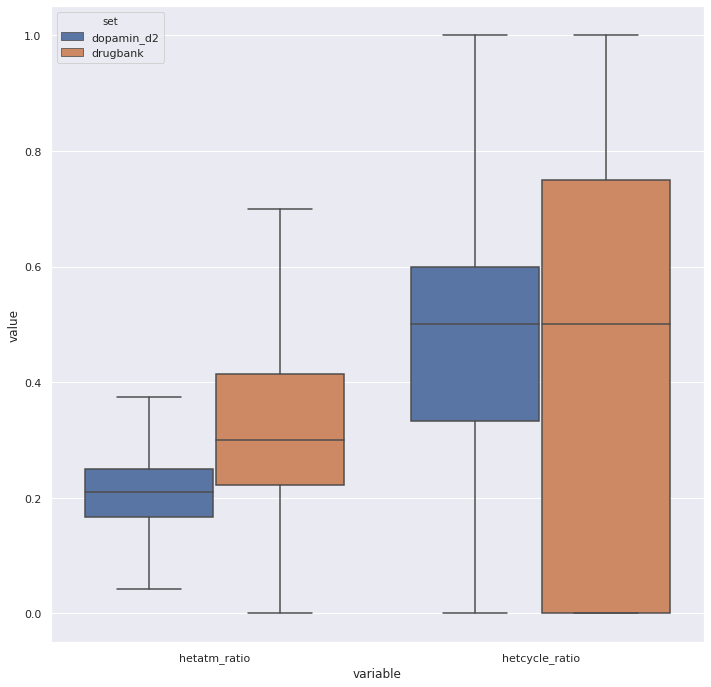

In [36]:
sns.boxplot(y="value", x="variable", hue="set", data=df_het, showfliers=False)

Heteroatomů je v ligandech d2 dopaminového receptoru méně, počty v heterocyklech jsou odpovídající. To bude nejspíše důvod menšího počtu akceptorů vodíkové vazby. 